# keywords and builtins
- hierarchy of how 'close' something is to the language itself:
  - keywords: modify syntax, not replaceable
  - builtins: very common functions, no import needed
  - standard library: delivered as part of python (no separate installation), but must be imported
  - third party library: must be installed first before it can be imported. Not provided by Python core devs.

- **keywords**: core language constructs that allow 'new syntax'. keywords are reserved and cannot be used as identifiers
- **builtins**: preloaded functions, constants, types, and exceptions. Fundamental only in the sense of common usage, but 'normal' language objects
- what is `print`
- what is `for`
- what is `True`

In [ ]:
import keyword

In [ ]:
print(keyword.kwlist)

- **control structures**: `if`, `elif`, `else`, `for`, `while`, `break`, `continue`, `pass`
- **exception handling**: `try`, `except`, `raise`, `finally`, `assert`
- **classes and function**: `class`, `def`, `return`, `lambda`, `yield`
- **scopes**: `global`, `nonlocal`
- **imports**: `import`, `from`, `as`
- **logical operators**: `and`, `or`, `not`
- **context managers**: `with`, `as`
- **coroutines**: `async`, `await`
- **others**: `del`, `in`, `is`
- **constants**: `True`, `False`, `None`

In [ ]:
# where are `match` and `case`? (soft keywords: to avoid breaking existing code when a new feature is introduced)
keyword.softkwlist

In [ ]:
import builtins

In [ ]:
print([x for x in dir(builtins) if not x.startswith('_')])

- **lots of exceptions and warnings**...
- **numeric functions**: `abs`, `divmod`, `pow`, `sum`, `min`, `max`, `round`
- **logical reductions**: `all`, `any`
- **data types & conversions**: `bool`, `bytearray`, `bytes`, `complex`, `dict`, `int`, `float`, `frozenset`, `list`, `set`, `str`, `tuple`, `memoryview`, `chr`, `ord`
- **number representations**: `bin`, `hex`, `oct`
- **inspection-functions**: `callable`, `dir`, `id`, `type`
- **decorators**: `classmethod`, `staticmethod`, `property`
- **inheritance**: `isinstance`, `issubclass`, `super`, `object`
- **iterable helpers**: `enumerate`, `zip`, `sorted`, `range`, `len`, `iter`, `next`, `map`, `reversed`, `aiter`, `anext`, `filter`
- **scoping**: `locals`, `globals`, `vars`
- **attributes**: `getattr`, `hasattr`, `delattr`, `setattr`
- **code execution** `exec`, `eval`, `compile`
- **slicing**: `Ellipsis`, `slice`
- **flow control**: `NotImplemented`, `quit`, `exit`, `breakpoint`
- **object representations**: `ascii`, `str`, `repr`, `bytes`, `format`
- **I/O**: `input`, `print`, `open`
- **other**: `hash`
- **actual help**: help

# Imports
- there's an extensive ecosystem of libraries available around python
- you can import these libraries using the `import` statement to make their functionality available in your code
- `import <module_name> [as <alias>]` -- import the entire module
- `from <module_name> import <object_names> [as <alias>]` -- import individual functions from a module (but lose the module prefix)

In [ ]:
import math
math.cos(math.pi)

In [ ]:
import math as m
m.cos(m.pi)

In [ ]:
# same but with intermediate variable `math` assigned
import math
m = math
m.cos(m.pi)

In [ ]:
from math import cos, pi
cos(pi)

In [ ]:
from math import cos as c, pi as π
c(π)

In [ ]:
# import from your own files is just as easy
import utils
utils.say_hello()

In [ ]:
# note: never ever do `from <module> import *

# standard library
- a large numer of packages
- comes with the python installation, no need to install anything separately
- [python docs](https://docs.python.org/3/library/index.html)

## file and directory access

### builtins: input, print, open

#### print

In [ ]:
print('hello')
print('world')

In [ ]:
# poor mans progress bar...
for _ in range(100):
    print('.', end='')

In [ ]:
help(print)

#### input

In [ ]:
user_input = input('Please enter a number')
print(f'You entered "{user_input}"')   # what happened to the newline when I pressed enter?

In [ ]:
help(input)

#### open
- opens file for (binary or text mode) reading and/or writing
- can (and usually should) be used as contextmanager

In [ ]:
# open files in text-mode for reading
with open('utils.py', 'r') as ifile:
    content = ifile.readlines()
content

In [ ]:
# rading in binary mode returns bytes rather than strings
with open('utils.py', 'rb') as ifile:
    content = ifile.readlines()
content

In [ ]:
# can also iterate over file object, give me one line each
with open('utils.py', 'r') as ifile:
    for line in ifile:
        print(line, end='')

In [ ]:
# writing to a file in text mode
with open('demo_file.txt', 'w') as ifile:
    ifile.write('Hello')

In [ ]:
# but opening in text mode overwrites the existing file (!)
with open('demo_file.txt', 'w') as ifile:
    ifile.write('World')

In [ ]:
# use append mode instead
with open('demo_file.txt', 'w') as ifile:
    ifile.write('Hello')
with open('demo_file.txt', 'a') as ifile:
    ifile.write('World')

In [ ]:
# we can also `print` to a file (difference is just the automatic newline)
with open('demo_file.txt', 'w') as ifile:
    print('Hello', file=ifile)
    print('World', file=ifile)

In [ ]:
# if we're writing text (rather than bytes) to a file opened in binary mode we need to convert to bytes first
with open('demo_file.txt', 'wb') as ifile:
    ifile.write('Hello'.encode())
    ifile.write('World'.encode())

In [ ]:
# we can of course write other bytes to the file
list_as_bytes = bytes([1, 2, 3])
list_as_bytes

In [ ]:
with open('demo_file.txt', 'wb') as ifile:
    ifile.write(list_as_bytes)

In [ ]:
with open('demo_file.txt', 'rb') as ifile:
    read_bytes = ifile.read()
read_bytes

In [ ]:
list(read_bytes)

In [ ]:
tuple(read_bytes)

### pathlib
- offers classes representing filesystem paths with semantics appropriate for different operating systems
- `Path` -- the only class in the module you'll likely need
- objects are immutable and hashable

In [ ]:
import pathlib

In [ ]:
current_dir = pathlib.Path('.')
current_dir

In [ ]:
current_dir.is_absolute()

In [ ]:
full_current_dir = current_dir.resolve()
full_current_dir

In [ ]:
# explicit alternative
pathlib.Path.cwd()

In [ ]:
# if you wat to access parts (OS-independent)
full_current_dir.parts

In [ ]:
# funny overwriting `__div__` for navigating paths (on all Operating Systems)
parent_dir = full_current_dir / '..'
parent_dir

In [ ]:
parent_dir.resolve()

In [ ]:
# explicit alternative:
full_current_dir.joinpath('..')

In [ ]:
# alternative, already resolved
full_current_dir.parent

In [ ]:
# can jump up N levels
full_current_dir.parents[3]

In [ ]:
# list files and subfolders
list(current_dir.iterdir())

In [ ]:
# match specifying filename patterns (similar expansion to your shell)
# there's also the `glob` module itself (not discussed in detail)
list(current_dir.glob('*.txt'))

In [ ]:
# is it a file or a directory?
current_dir.is_dir()

In [ ]:
demo_file = current_dir / 'demo_file.txt'
demo_file.is_dir()

In [ ]:
# just the file name
print(f'{demo_file.name = }\n{demo_file.stem = }\n{demo_file.suffix = }')

In [ ]:
# open files directly (with context manager)
with demo_file.open('rb') as ifile:
    print(ifile.read())

### shutil [skip]
- high-level file operations
- Might not copy all file metadata though!

- `shutil.copy` -- copy file from src to dest, where src and dest are path-like objects
- `shutil.copy2` -- like `copy`, but tries to preserve all file metadata
- `shutil.copytree` -- copies directory structure recursively, uses `copy2` by default for files
- `shutil.rmtree` -- deletes directory structure recursively
- `shutil.move` -- move file or directory

In [ ]:
import pathlib, shutil

In [ ]:
src = pathlib.Path.cwd() / 'demo_file.txt'
dest = pathlib.Path.cwd() / 'copied_file.txt'
shutil.copy(src, dest)

In [ ]:
src.stat().st_mtime  # mtime: modified; atime: accessed; ctime: (metadata) change time

In [ ]:
dest.stat().st_mtime

In [ ]:
src = pathlib.Path.cwd() / 'demo_file.txt'
dest = pathlib.Path.cwd() / 'copied_file.txt'
shutil.copy2(src, dest)

In [ ]:
src.stat().st_mtime

In [ ]:
dest.stat().st_mtime

## Text

### string [skip]
- useful constants, such as lists of ascii characters
- `Formatter` class to customize your own string formatting rules
- `Template` class, can be used for i18n
- `capwords` helper function

In [ ]:
import string
print([x for x in dir(string) if not x.startswith('_')])

In [ ]:
string.ascii_lowercase

In [ ]:
# could (possibly) have been used in the number parsing exercise, or the number finding exercise
string.digits

In [ ]:
string.capwords('   this  here \tis some sentence')

### re
- library for regular expressions
- regular expressions are an extremely powerful tool for parsing strings
- unfortunately, they are also rather hard to read/understand...
- since '\\' is frequently used in regular expressions `r-strings` (raw strings) are useful for specifying expressions
- if you're trying to write regular expressions go use [regex101](https://regex101.com/)
- also: [python documentation](https://docs.python.org/3/library/re.html)

#### important functions
- `re.search`: find and return the first match of the pattern in the string
- `re.match`: test if the beginning of a string matches the expression
- `re.fullmatch`: test if the entire string matches the expression
- `re.findall`: returns a list of all non-overlapping matches of the pattern in the string
- `re.sub`: replace all occurences of pattern with a new string
- `re.compile`: makes regular expressions more efficient if the same expression is used multiple times

In [ ]:
import re

In [ ]:
sample_text = 'lorem ipsum, by the way I think the time is 10:33:47, or maybe it is 17:23:11, and still the sample string goes on...'

In [ ]:
match = re.search(r'\d\d:\d\d:\d\d', sample_text)
match

In [ ]:
sample_text[match.start():match.end()]

In [ ]:
# if there's no match search returns ``None`
nomatch = re.search(r'hello', sample_text)
print(nomatch)

In [ ]:
# compiling patterns
time_pattern = re.compile(r'(\d{2}):(\d{2}):(\d{2})')

In [ ]:
# capturing groups: extract parts of the match
match = re.search(time_pattern, sample_text)
match.groups()

In [ ]:
matches = re.findall(time_pattern, sample_text)
matches

In [ ]:
# all words with at least four characters
words = re.findall(r'\w{4,}', sample_text)
print(words)

In [ ]:
# all words with at most two characters, separated by whitespace
words = re.findall(r' (\w{,2}) ', sample_text)
print(words)

In [ ]:
print(re.match(r'\d*?(\d)\1\d*', '123456'))

In [ ]:
print(re.match(r'\d*?(\d)\1\d*', '123356'))

In [ ]:
print(re.match(r'\d*?(\d)\1\d*', '123336'))  # unfortunately also matches

In [ ]:
print(re.match(r'((^)|(\d))((?(3)(?!\3)\d|\d))\4(?!\4)', '123456'))

In [ ]:
print(re.match(r'((^)|(\d))((?(3)(?!\3)\d|\d))\4(?!\4)', '122345'))

In [ ]:
print(re.match(r'((^)|(\d))((?(3)(?!\3)\d|\d))\4(?!\4)', '122245'))

In [ ]:
print(re.match(r'((^)|(\d))((?(3)(?!\3)\d|\d))\4(?!\4)', '123345'))

### unicodedata
- contains everything you didn't want to know about unicode

In [ ]:
import unicodedata

#### character names

In [ ]:
unicodedata.name('{')

In [ ]:
unicodedata.lookup('GREEK SMALL LETTER MU')

In [ ]:
unicodedata.lookup('MICRO SIGN')

In [ ]:
unicodedata.lookup('MICRO SIGN') == unicodedata.lookup('GREEK SMALL LETTER MU')

In [ ]:
unicodedata.name('µ')

In [ ]:
unicodedata.name('μ')

#### character decomposition

In [ ]:
cafe_1 = unicodedata.normalize('NFD', 'café')  # normalized form (canonical) decomposition
cafe_2 = unicodedata.normalize('NFC', 'café')  # normalized form (canonical) composition
print(cafe_1)
print(cafe_2)

In [ ]:
print(f'{len(cafe_1)=}\n{len(cafe_2)=}')

In [ ]:
print([unicodedata.name(x) for x in cafe_1])
print([unicodedata.name(x) for x in cafe_2])

In [ ]:
print(cafe_1, cafe_1[-1])
print(cafe_2, cafe_2[-1])

In [ ]:
# do not assume strings to be only NFC or only NFD. the following is entirely legal unicode:
cafe_1[-2:] + cafe_2[-1]
# (you can use the normalize functions from above to unify to one version)

#### weird numbers

In [ ]:
ethiopian_three = '\u136b'
print(ethiopian_three)

In [ ]:
unicodedata.numeric(ethiopian_three)

In [ ]:
unicodedata.digit(ethiopian_three)

In [ ]:
ethiopian_three.isdigit()

In [ ]:
float(ethiopian_three)

#### unicode categories

In [ ]:
unicodedata.category('a')  # lowercase letter

In [ ]:
unicodedata.category('&')  # other punctuation

In [ ]:
unicodedata.category('$')  # currency symbol

In [ ]:
unicodedata.category('3')  # decimal number

In [ ]:
unicodedata.category(ethiopian_three)  # other number

In [ ]:
# remark: also relevant for which symbols are allowed in variable names:
# https://docs.python.org/3/reference/lexical_analysis.html

## functional programming support

### operator
- efficient functions corresponding to the built-in operators

- comparison operators: `lt`, `le`, `eq`, `ge`, `gt`, `ne`
- logical operators: `and`, `or`, `not`, ...
- arithmetic operators: `add`, `sub`, `mul`, `truediv`, `floordiv`, `mod`, `pow`, ...
- indexing: `getitem`, `setitem`, `delitem`
- bitwise operators: `lshift`, `rshift, `and_`, `or_`, `invert`, ...
- ...

In [ ]:
import operator

In [ ]:
operator.add(2, 5)

In [ ]:
opcode_map = {
    1: operator.add,
    2: operator.mul,
}

In [ ]:
opcode, *args = [1, 2, 3]
opcode_map[opcode](*args)

### itertools
- Functions creating iterators for efficient looping¶
- infinite iterators: `count`, `repeat`, `cycle`
- combinatorics: `product`, `permutations`, `combinations`, `combinations_with_replacement`
- terminating iterators: `accumulate`, `chain`, `compress`, `dropwhile`, `filterfalse`, `groupby`, `islice`, `pairwise`, `starmap`, `takewhile`, `tee`, `zip_longest`

In [ ]:
import itertools, string, time

In [ ]:
# `list` added to show results, really all of this works only on iterators, only realizing the contents when needed
list(itertools.accumulate(range(10), operator.add))

In [ ]:
list(itertools.chain(range(3), range(3)))

In [ ]:
list(itertools.compress(string.ascii_lowercase, [0, 1, 1, 0, 1, 0, 1]))

In [ ]:
list(itertools.pairwise(string.ascii_lowercase))

In [ ]:
list(itertools.product([1, 2, 3], [4, 5, 6]))  # basically a nested for

In [ ]:
# clarify that we're only creating iterators, not realising the values until we need them

t0 = time.monotonic()
tmp = itertools.product(range(10000), range(10000))
print(f'creation took {1000*(time.monotonic()-t0)}ms')

In [ ]:
t0 = time.monotonic()
len(list(tmp))
print(f'getting the length took {1000*(time.monotonic()-t0)}ms')

In [ ]:
list(itertools.permutations('ABC'))

In [ ]:
list(itertools.combinations('ABC', 2))

In [ ]:
list(itertools.combinations_with_replacement('ABC', 2))

### functools [skip]
- higher-order functions: functions that act on or return other functions
- caching decorators: `cache`, `cached_property`, `lru_cache` (see week 2)
- `partial`: generate a new function from an existing function, with some arguments already set
- `reduce`: apply iteratively to elements of iterable from left to right. also compare `all`, `any`, `filter`, `map` (builtins); but: list comprehensions...
- `singledispatch`: branch functions depending on argument type
- `wraps`: decorator for creating decorators while maintaining name/docstrings etc of the wrapper function

In [ ]:
import functools
import operator


In [ ]:
def sum_of_three(a, b, c):
    print(a + b + c)

sum_with_eight = functools.partial(sum_of_three, 3, 5)
sum_with_eight(2)

In [ ]:
functools.reduce(operator.add, range(10))

In [ ]:
functools.reduce(operator.xor, range(13))

In [ ]:
@functools.singledispatch
def type_dependent_function(obj):
    print("this is the default...", obj)

@type_dependent_function.register(int)
def _(obj):
    print("integers are nice", obj)

@type_dependent_function.register(float)
def _(obj):
    print("but if this floats your boat...", obj)

In [ ]:
type_dependent_function('hello')

In [ ]:
type_dependent_function(1)

In [ ]:
type_dependent_function(3.1415)

In [ ]:
def the_decorator(wrapped_function):
    @functools.wraps(wrapped_function)
    def wrapper(*args, **kwds):
        print('Calling decorated function')
        return wrapped_function(*args, **kwds)
    return wrapper


@the_decorator
def my_function(*args, **kwargs):
    """There be some fancy docstring here"""
    print('Called example function')

In [ ]:
my_function('test')

In [ ]:
print(my_function)

In [ ]:
help(my_function)

## data types

### datetime & zoneinfo
- classes for manipulating dates and times
- objects may be timezone 'naive' or timezone 'aware'
- naive == no timezone information set, aware == timezone information available
- avoid naive objects in production
  - store dates/times either as timezone-aware objects (eg timestamp_tz in postgres) or as **explicit** utc times/dates
  - convert once on input, and deal with tz-aware objects forever after
- ojects in datetime offer microsecond resolution for dates between year 1 and year 9999
- objects are immutable and hashable

- `datetime.date`: naive date, assuming gregorian calendar
- `datetime.time`: idealized time (no leap seconds), with (optional) timezone info
- `datetime.datetime`: a real timestamp (date+time), with (optional) timezone info
- `datetime.timedelta`: difference between two date/time/datetime objects
- `datetime.timezone`: simple timezone class (see zoneinfo)
- `zoneinfo.Zoneinfo`: named timezone objects

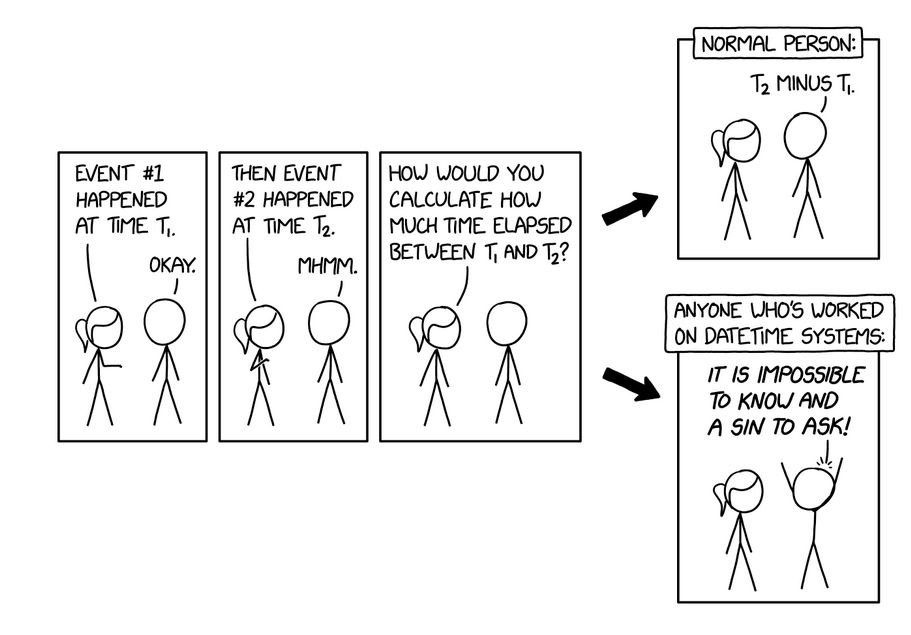

In [ ]:
import datetime
import zoneinfo

#### creating datetime objects

In [ ]:
date_1 = datetime.datetime(2023, 1, 1, 11, 22, 33)
print(date_1)

In [ ]:
print(date_1.tzinfo)  # timezone-naive!

In [ ]:
tz_utc = zoneinfo.ZoneInfo('UTC')

In [ ]:
date_1 = datetime.datetime(2023, 1, 1, 21, 22, 33, tzinfo=tz_utc)
print(date_1)

In [ ]:
# alternative constructor
local_now = datetime.datetime.now()
print(local_now)
print(local_now.tzinfo) # naive!

In [ ]:
utc_now = datetime.datetime.utcnow()
print(utc_now)
print(utc_now.tzinfo) # still naive!

#### timezone conversion

In [ ]:
tz_berlin = zoneinfo.ZoneInfo('Europe/Berlin')
tz_tokyo = zoneinfo.ZoneInfo('Asia/Tokyo')

In [ ]:
date_1 = datetime.datetime(2023, 1, 1, 21, 22, 33, tzinfo=tz_utc)

In [ ]:
date_1_berlin = date_1.astimezone(tz_berlin)
print(date_1_berlin)

In [ ]:
date_1_tokyo = date_1.astimezone(tz_tokyo)
print(date_1_tokyo)

In [ ]:
# conversion with naive (assumed local)
utc_now = datetime.datetime.utcnow()
print(utc_now.astimezone(tz_utc))  # wrong result! 

In [ ]:
print(utc_now.replace(tzinfo=tz_utc))  # this is better

In [ ]:
local_now = datetime.datetime.now()
print(local_now.astimezone(tz_utc))  # this also works

#### timestamp differences

In [ ]:
date_1 = datetime.datetime(2023, 1, 1, 21, 22, 33, tzinfo=tz_utc)
date_2 = datetime.datetime(2022, 6, 15, 13, 14, 15, tzinfo=tz_utc)
timediff = date_1 - date_2
print(f'{timediff!s} -- {timediff!r}')

In [ ]:
timediff = date_2 - date_1
print(f'{timediff!s} -- {timediff!r}')

In [ ]:
print(f'{date_1_berlin-date_1_tokyo=} == {date_1_berlin - date_1_tokyo}')

In [ ]:
# can't calculate difference between naive and aware objects
utc_now - date_1

#### components

In [ ]:
print(date_1.year, date_1.month, date_1.day)

In [ ]:
print(date_1.hour, date_1.minute, date_1.second)

#### timestamp strings

In [ ]:
date_1.strftime('%Y-%m-%d')

In [ ]:
date_1.strftime('%H:%M:%S')

In [ ]:
date_1.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
print(f'{date_1:%Y-%m-%d}')  # also in f-strings

In [ ]:
date_1.isoformat()  # for (text) serialization use this format!

In [ ]:
date_1.astimezone(tz_tokyo).isoformat()

In [ ]:
date_string = date_1.astimezone(tz_tokyo).isoformat()
datetime_from_iso_string = datetime.datetime.fromisoformat(date_string)  # no memory of tokyo, just the offset
print(datetime_from_iso_string)
print(datetime_from_iso_string.tzinfo)

In [ ]:
print(date_1.astimezone(tz_tokyo).tzinfo)

In [ ]:
datetime_from_string = datetime.datetime.strptime('2023-11-12 13:14:15', '%Y-%m-%d %H:%M:%S')
print(datetime_from_string)
print(datetime_from_string.tzinfo)

In [ ]:
datetime.datetime.strptime('2023-11-12 13:14:15.123', '%Y-%m-%d %H:%M:%S')

### collections [skip]
- implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, `dict`, `list`, `set`, and `tuple`

- `namedtuple` -- like a tuple, but with named fields
- `deque` -- like a list, but appends and pops are fast on both sides (lists are only fast at the end)
- `defaultdict` -- dict with default values for all keys
- `Counter` -- counts elements in iterables
- `UserDict`, `UserList`, `UserString` -- for easier subclassing of  builtin types (see last week)

In [ ]:
import collections

#### namedtuple

In [ ]:
Card = collections.namedtuple('Card', ['rank', 'suite'])
card = Card('Ace', 'Clubs')
print(card)
card.suite

#### deque

In [ ]:
q = collections.deque([1, 2, 3])
q.appendleft(0)
q.appendleft(-1)
print(f'{q} -- after adding two left elements')
q.append(4)
print(f'{q} -- after adding one right element')
q.pop()
print(f'{q} -- after pop right')
q.popleft()
print(f'{q} -- after pop left')

In [ ]:
%%timeit
q = collections.deque()
for i in range(100000):
    q.appendleft(i)

In [ ]:
%%timeit
l = list()
for i in range(100000):
    l.insert(0, i)

#### defaultdict

In [ ]:
normal_dict = {}
default_dict = collections.defaultdict(int)

In [ ]:
normal_dict['key'] = 5
default_dict['key'] = 5

In [ ]:
print(f"{normal_dict['key'] = }")
print(f"{default_dict['key'] = }")

In [ ]:
normal_dict['no_key_here']

In [ ]:
default_dict['no_key_here']

In [ ]:
# can get the same from a normal dict with special method
normal_dict.get('no_key_here', 0)

In [ ]:
# doesn't have to be zero, just needs a function that returns the default entry
default_five = collections.defaultdict(lambda: 5)
default_five['no_key_here']

In [ ]:
default_string = collections.defaultdict(str)
default_string['no_key_here']

In [ ]:
default_string_2 = collections.defaultdict(lambda: "there was no entry for this key...")
default_string_2['no_key_here']

#### Counter

In [ ]:
cntr = collections.Counter('this here be some long string')
cntr

In [ ]:
first_list = ['ybk', 'zcg', 'dhw', 'gua', 'mqh', 'yel', 'fpk', 'imk', 'nkt', 'tpl', 'guc', 'ozk', 'dip', 'thn', 'pxc', 'obk', 'orl', 'rdc', 'vto', 'wen', 'tbw', 'itj', 'qfb', 'ymd', 'txb', 'vgw', 'wgd', 'tcg', 'ezm', 'gnt', 'ehf', 'pfo', 'alf']
collections.Counter(''.join(first_list))

### array [skip]
- sort of like a list
- but for specified, uniform, basic types (numbers, characters)
- numbers can range from 1-byte `chars` up to 8-byte `doubles` and `long long`s (but not arbitrary size integers)
- integers can be signed or unsigned
- arithmetic works like for lists
- use 3-rd party library `numpy` for n-dimensional arrays with arithmetic, linear algebra etc...

In [ ]:
import array

In [ ]:
help(array)

In [ ]:
unicode_array = array.array('u', 'Hello there! 😀')
unicode_array

In [ ]:
char_array = array.array('b', [1, 2, 3, 4, 5])  # b: signed 1-byte integer
char_array

In [ ]:
char_array.append(2**8)

In [ ]:
double_array = array.array('d', [3.1415, 2.718, 1e5])
double_array

### copy [skip]
- shallow or deep copy operations on objects

In [ ]:
import copy

In [ ]:
def modifying_function(some_dict):
    some_dict['new_key'] = 'hey, set by a function'

In [ ]:
d = dict()
modifying_function(d)
print(d)

In [ ]:
d = dict()
modifying_function(copy.copy(d))
print(d)

In [ ]:
def deep_modifying_function(some_dict):
    some_dict['inner_dict']['new_key'] = 'hey, set by a function'

In [ ]:
d = dict()
d['inner_dict'] = dict()
deep_modifying_function(d)
print(d)

In [ ]:
d = dict()
d['inner_dict'] = dict()
deep_modifying_function(copy.copy(d))
print(d)

In [ ]:
d = dict()
d['inner_dict'] = dict()
deep_modifying_function(copy.deepcopy(d))
print(d)

### base64 [skip]
- provides functions for encoding binary data to printable ASCII characters and decoding such encodings back to binary data.
- mostly for transmitting binary data as part of URLs or in http POST requests
- `base64.b64encode` / `base64.b64decode` -- en/de-code using the standard alphabet
- `base64.urlsafe_b64encode` / `base64.urlsafe_b64decode` -- en/de-code using the urlencode alphabet

In [ ]:
import base64

In [ ]:
list_as_bytes = bytes([1, 2, 3])
list_as_bytes

In [ ]:
list_as_b64 = base64.b64encode(list_as_bytes)
list_as_b64

In [ ]:
decoded_list_as_bytes = base64.b64decode(list_as_b64)
decoded_list_as_bytes

In [ ]:
list(decoded_list_as_bytes)

## mathemtical things

### math & cmath
- `math` all the mathematical functions defined in C99 for real numbers
- `cmath` all the mathematical functions defined in C99 for complex numbers

- rounding: `trunc`, `floor`, `ceil`, ...
- combinatorics: `comb`, `perm`, ...
- integer arithmetics: `factorial`, `gcd`, `lcm`, ...
- (float) modulo: `fmod` (watch out, different from `%`)
- trigonometry: `sin`, `cos`, `tan`, `asin`, `acos`, `atan`, `sinh`, `cosh`, `tanh`, `asinh`, `acosh`, `atanh`
- angles: `degrees`, `radians` for conversion
- log and exp: `exp`, `exp2`, `log`, `log2`, `log10`, `pow`, ...
- special functions: `erf`, `gamma`, ...
- value tests: `isinf`, `isfinite`, `isnan`
- constants: `pi`, `e`, `tau`, `nan`, `inf`

In [ ]:
import math
import cmath

In [ ]:
math.inf == float('inf')

In [ ]:
math.nan == float('nan')  # just because nans always compare unequal

In [ ]:
math.comb(7, 3)   # 7 choose 3 without order

In [ ]:
# basically math.comb just tells you how many results you'll get in itertools.combinations
len(list(itertools.combinations(string.ascii_lowercase[:7], 3)))

In [ ]:
math.perm(7, 3)  # 7 choose 3 with order

In [ ]:
# basically math.perm just tells you how many results you'll get in itertools.permutations
len(list(itertools.permutations(string.ascii_lowercase[:7], 3)))

In [ ]:
math.cos(math.pi)

In [ ]:
math.acos(-1)

In [ ]:
math.acos(1)

In [ ]:
math.acos(0)

In [ ]:
cmath.exp(math.pi*1j)

### random
- generate pseudorandom numbers from various distributions, and related functions
- pseudorandom numbers are **not** suitable for cryptographic applications! take a look at `secrets` or 3rd party libraries
- for matrices (or otherwise large arrays) of random numbers and additional distributions look into `numpy` and `scipy`

- `random.seed`: set the seed for pseudorandom generator (same seed = same sequence will be generated)
- `random.randrange` - random element from range
- `random.randint` - uniform random int between min and max (both inclusive!)
- `random.random` - uniform floating point between 0 (inclusive) and 1 (exclusive)
- `random.uniform` - uniform floating point between min and max
- `random.gauss` - normal distribution
- `random.choice` - return random element from sequence
- `random.shuffle` - shuffle sequence in-place
- `random.sample` - return k elements from sequence without replacement

In [ ]:
import random, string

In [ ]:
random.seed(42)

In [ ]:
random.randint(1, 10)

In [ ]:
random.choice(string.ascii_lowercase)

In [ ]:
random.choice(['abc', 'def', 'ghi'])

In [ ]:
random.sample(string.ascii_lowercase, 5)

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
uniform_data = [random.uniform(-1, 1) for _ in range(100000)]
normal_data = [random.gauss() for _ in range(100000)]

plt.hist(normal_data, bins=100, range=(-4, 4), alpha=0.5);
plt.hist(uniform_data, bins=100, range=(-4, 4), alpha=0.5);

### decimal
- decimal numbers with configurable precision
- 'exact' within that precision
- useful particularly for e.g. accounting

In [ ]:
import decimal

In [ ]:
0.1 + 0.1 + 0.1 - 0.3

In [ ]:
decimal.Decimal(0.1) + decimal.Decimal(0.1) + decimal.Decimal(0.1) - decimal.Decimal(0.3)

In [ ]:
decimal.Decimal('0.1') + decimal.Decimal('0.1') + decimal.Decimal('0.1') - decimal.Decimal('0.3')

In [ ]:
with decimal.localcontext(traps=[decimal.FloatOperation]):
    decimal.Decimal(0.1)

In [ ]:
# significance
decimal.Decimal('1.50') + decimal.Decimal('1.50')

In [ ]:
# setting precision
with decimal.localcontext(prec=3):
    print(decimal.Decimal('1.23456'))
    print(decimal.Decimal(1) / decimal.Decimal(7))
    print(decimal.Decimal('1.23456') + decimal.Decimal('1.23456'))

In [ ]:
# setting precision
with decimal.localcontext(prec=345):
    print(decimal.Decimal(1) / decimal.Decimal(7))

## data persistence

### csv
- csv: 'comma separated values' -- common data interchange format for tabular data
- there is a standard ([RFC 4180](https://datatracker.ietf.org/doc/html/rfc4180.html)), but it's often ignored and/or misused
- making the parsing of csv files tedious and error-prone
- the `csv` module supports various 'dialects' of csv-files

In [ ]:
import csv

In [ ]:
with open('../data/titanic.csv', 'r') as ifile:
    reader = csv.reader(ifile)
    data = [line for line in reader]

In [ ]:
for line in data[:3]:
    print(line)

In [ ]:
# and writing it again
with open('../data/demo_output.csv', 'w') as ifile:
    writer = csv.writer(ifile)
    writer.writerows(data[:3])

In [ ]:
# DictReader assumes the first line to be headers and uses the values as keys for dictionaries, each row becoming a dict.
with open('../data/titanic.csv', 'r') as ifile:
    reader = csv.DictReader(ifile)
    data = [line for line in reader]

In [ ]:
data[0]

In [ ]:
# Terrible excel interpretation of what 'csv' means...
with open('../data/bad_excel_titanic.csv', 'r') as ifile:
    reader = csv.DictReader(ifile)
    data = [line for line in reader]

In [ ]:
data[0]

In [ ]:
# Terrible excel interpretation of what 'csv' means...
with open('../data/bad_excel_titanic.csv', 'r') as ifile:
    dialect = csv.Sniffer().sniff(ifile.read(2048))
    ifile.seek(0)
    reader = csv.DictReader(ifile, dialect=dialect)
    data = [line for line in reader]
data[0]

In [ ]:
dialect.delimiter, dialect.quotechar

### json
- javascript object notation
- lightweight, text-based, language-independent data interchange format
- but the syntax already maps quite nicely to python as-is, making the content easy to understand
- standardized in [RFC7159](https://datatracker.ietf.org/doc/html/rfc7159.html)
- some 

- `load`: parse json data from a file object
- `loads`: parse json data from a string
- `dump`: encode objects as json data and write to file
- `dumps`: encode objects as json strings

<div class="alert alert-block alert-warning">
<b>Untrusted data:</b> <br>
<a>
Be cautious when parsing JSON data from untrusted sources. A malicious JSON string may cause the decoder to consume considerable CPU and memory resources. Limiting the size of data to be parsed is recommended.
</a>
</div>

In [ ]:
import json

In [ ]:
encoded_list = json.dumps([1, '2', 3.1415])
encoded_list

In [ ]:
decoded_list = json.loads(encoded_list)
decoded_list

In [ ]:
for element in decoded_list:
    print(f"{element} is a {type(element)}")

In [ ]:
encoded_dict = json.dumps({'a': 'foo', 'b': 3.1415})
encoded_dict

In [ ]:
decoded_dict = json.loads(encoded_dict)
decoded_dict

In [ ]:
# arbitrary nesting works just fine
my_data = {
    "some_key": "simple",
    "mixed_list": [1, "2", 3.1415, {"inner_dict": "also_works"}],
    "dict": {
        "my_list": [1, 2, 3]
    }
}
encoded_data = json.dumps(my_data)
encoded_data

In [ ]:
restored_data = json.loads(encoded_data)
restored_data

In [ ]:
restored_data == my_data

#### possible issues

In [ ]:
# json standard only supports strings as keys
encoded_dict = json.dumps({17: "seventeen"})
decoded_dict = json.loads(encoded_dict)
decoded_dict

In [ ]:
for k, v in decoded_dict.items():
    print(f"{k} is a {type(k)} and {v} is a {type(v)}")

In [ ]:
# and even worse, collisions can occur and are silent
encoded_dict = json.dumps({17: "int_key", '17': 'str_key'})
decoded_dict = json.loads(encoded_dict)
decoded_dict

In [ ]:
# order matters...
encoded_dict = json.dumps({'17': "str_key", 17: 'int_key'})
decoded_dict = json.loads(encoded_dict)
decoded_dict

In [ ]:
# the reverse is also possible
weird_json = '{"x": 1, "x": 2, "x": 3}'
json.loads(weird_json)

In [ ]:
# constants and weird floats
funky_json = json.dumps([True, False, None, float('nan'), float('inf')])
funky_json

In [ ]:
json.loads(funky_json)

In [ ]:
# NaNs and Infinity are beyond the standard though
json.dumps([float('nan'), float('inf')], allow_nan=False)

In [ ]:
# recursion dosn't work...
recursive_list = [1, 2, 3]
recursive_list.append(recursive_list)
recursive_list

In [ ]:
recursive_list[-1]

In [ ]:
json.dumps(recursive_list)

### pickle
- serialize and deserialize arbitrary python objects
- serialization: converting Python objects into a byte stream that can be easily stored, transmitted, or shared
- `pickle.dump` -- serialize a python object and write it to a file object
- `pickle.load` -- the reverse, load bytes from file and restore python object
- `pickle.dumps` / `pickle.loads` -- the same but to/from just bytes
- look at `dill` for a third-party extension allowing to serialize more types of objects

#### important considerations

<div class="alert alert-block alert-warning">
<b>Untrusted data:</b> <br>
<a>
    don't every unpickle data from untrusted sources, as unpickling can lead to code execution
</a>
</div>

- not all objects can be pickled (file handles, database connections, ...) and attempting to do so will result in errors
- restoring old pickles into updated versions of your code can lead to incompatibilities

#### basic pickling/unpickling

In [ ]:
import pickle

In [ ]:
list_bytes = bytes([1, 2, 3])
list_bytes

In [ ]:
list(list_bytes)

In [ ]:
tuple(list_bytes)

In [ ]:
pickled_list = pickle.dumps([1, 2, 3])
pickled_list

In [ ]:
pickle.loads(pickled_list)

In [ ]:
pickle.loads(list_bytes)

In [ ]:
print(list(pickled_list))

In [ ]:
with open('stored_list.pickle', 'wb') as ifile:
    pickle.dump([1, 2, 3], ifile)

In [ ]:
with open('stored_list.pickle', 'rb') as ifile:
    print(ifile.read())

In [ ]:
with open('stored_list.pickle', 'rb') as ifile:
    print(pickle.load(ifile))

#### pickling custom objects/classes

In [ ]:
class PickleDemo:
    def say(self):
        print(f"Hey, I'm a pickle demo")

In [ ]:
pd = PickleDemo()
pd.say()

In [ ]:
pickled_pd = pickle.dumps(pd)
pickled_pd

In [ ]:
restored_pd = pickle.loads(pickled_pd)
restored_pd.say()

In [ ]:
# the class still needs to be defined!
del PickleDemo

In [ ]:
pickle.loads(pickled_pd)

In [ ]:
class PickleDemo:
    def say(self):
        print(f"hello, I'm new")

In [ ]:
# the method code is actually taken from the new class, the pickle just tells you to create an instance
new_pd = pickle.loads(pickled_pd)

In [ ]:
new_pd.say()

In [ ]:
# you made some changes to your code and updates your pickle class to have an attribute

In [ ]:
class PickleDemo:
    def __init__(self, attribute):
        self.some_attribute = attribute

    def say(self):
        print(f"Hey, I'm a pickle demo, and my attribute is \"{self.some_attribute}\"")

In [ ]:
restored_pd = pickle.loads(pickled_pd)
restored_pd.say()

In [ ]:
# but the value of the attribute is stored in the pickle
pd_with_attribute = PickleDemo("attribute_value")
pd_with_attribute.say()

In [ ]:
pickled_pd_with_attribute = pickle.dumps(pd_with_attribute)
restored_with_attribute = pickle.loads(pickled_pd_with_attribute)
restored_with_attribute.say()

#### some un-pickle-able objects

In [ ]:
# closures
def my_function(a, b):
    def inner_function():
        print(f"hey there, from function f with arguments {a} and {b}")
    return inner_function

In [ ]:
pickled_f = pickle.dumps(my_function(3, 5))
pickled_f

In [ ]:
try:
    fp = open('demo_file.txt', 'rb')
    pickle.dumps(fp)
finally:
    fp.close()

In [ ]:
# unlike json, recursion works just fine though
recursive_list = [1, 2, 3]
recursive_list.append(recursive_list)
recursive_list

In [ ]:
encoded_recursive_list = pickle.dumps(recursive_list)
encoded_recursive_list

In [ ]:
restored_recursive_list = pickle.loads(encoded_recursive_list)
restored_recursive_list

In [ ]:
restored_recursive_list[-1]

#### customizing pickling behaviour

In [ ]:
class MyFileReader:
    def __init__(self, filename):
        self.fp = open(filename)

    def read(self):
        return self.fp.read()

    def close(self):
        self.fp.close()

In [ ]:
my_reader = MyFileReader('demo_file.txt')
my_reader.read()

In [ ]:
try:
    pickle.dumps(my_reader)
finally:
    my_reader.close()

In [ ]:
class MyPickleFileReader:
    def __init__(self, filename):
        print('calling init')
        self.fp = open(filename)
        self.filename = filename

    def __reduce__(self):
        return (self.__class__, (self.filename, ))

    def read(self):
        return self.fp.read()

    def close(self):
        self.fp.close()

In [ ]:
my_pickle_reader = MyPickleFileReader('demo_file.txt')
# my_pickle_reader.open()
my_pickle_reader.read()

In [ ]:
try:
    pickled_reader = pickle.dumps(my_pickle_reader)
    print('sucessfully pickled')
finally:
    my_pickle_reader.close()

In [ ]:
pickled_reader

In [ ]:
restored_reader = pickle.loads(pickled_reader)

In [ ]:
restored_reader.read()

In [ ]:
restored_reader.close()

#### BUT: this is dangerous if you get pickles from untrusted sources!

In [ ]:
class Exploit:
    def __reduce__(self):
        return (print, ("You've been pwned!", ))

exploit = Exploit()
pickled_exploit = pickle.dumps(exploit)
pickled_exploit

In [ ]:
# sending this pickle to your system, which doesn't know about the `Exploit` class
del Exploit

In [ ]:
# but still...
pickle.loads(pickled_exploit)

## generic operating system and runtime services

### os [skip]
- platform-independent way of interacting with the operating system
  - read environment variables
  - low-level file access: prefer builtins (`open`) as well as `pathlib` and `shutil`
  - process management (running external commands): prefer e.g. `subprocess`
  - reading and changing user-ids/groups/...

In [ ]:
os.name

In [ ]:
os.uname()

In [ ]:
os.environ

In [ ]:
os.sep  # path separator

In [ ]:
os.linesep

In [ ]:
os.getcwd()

In [ ]:
os.chdir()  # change working directory

In [ ]:
os.system('ls')

In [ ]:
# loads and loads of stuff for directory/file manipulation
# CPU time scheduler, starting/stopping/killing other processes
# special devices/mounts/...

### sys [skip]
- provides access to the Python interpreter's variables and functions, allowing us to interact with and control various aspects of the Python runtime.
  - search path
  - command line arguments
  - python version and platform information
  - I/O redirection
  - recursion limits and other interpreter-specific settings

In [ ]:
import sys

#### Interpreter Info

In [ ]:
sys.version

In [ ]:
sys.implementation

In [ ]:
sys.platform

In [ ]:
sys.byteorder

In [ ]:
sys.float_info

In [ ]:
sys.flags

In [ ]:
print(sys.copyright)

In [ ]:
# and many many more...

#### controlling interpreter behaviour

In [ ]:
sys.getrecursionlimit()
sys.setrecursionlimit(200)

In [ ]:
i = 0
def infitite_recursion():
    global i
    i += 1
    infitite_recursion()
infitite_recursion()

In [ ]:
print(i)

In [ ]:
sys.setrecursionlimit(3000)

In [ ]:
sys.get_int_max_str_digits()

In [ ]:
sys.set_int_max_str_digits(640)

In [ ]:
value = 2**10000

In [ ]:
value

In [ ]:
sys.set_int_max_str_digits(4300)

#### command line arguments
- `sys.argv` contains command line arguments passed to the interpreter

In [ ]:
# first element: script name
# any other elements: arguments
sys.argv

In [ ]:
# demo: utils.py
# also see package `argparse`

#### search path
- `sys.path` is a list of directories that Python searches for modules when you use the import statement.
- this allows you to `import` (e.g. your own) packages/modules from non-standard locations
- look into building real packages and installing those (in development mode) for a better alternative

In [ ]:
sys.path

#### in/output stream redirection

In [ ]:
with open('stdout.txt', 'w') as ifile:
    original_stdout = sys.stdout
    sys.stdout = ifile
    print('hello')
    sys.stdout = original_stdout

### time
- provides various time-related functions. see also `datetime`
- not all functions are available on all platforms. See [documentation](https://docs.python.org/3/library/time.html) for details.
- use `datetime` for conversion from/to strings, timestamps and timestamp differences
- use `time` or the `timeit` module for (simple) measuring of the execution time of your code
- use `time.sleep` for (blocking) waits for a specified amount of time

- `time.sleep`: wait for the specified number of seconds
- `time.time` / `time.time_ns`: current time in (fractional) seconds since the epoch (1970-01-01 00:00+00:00)
- `time.monotonic` / `time.monotonic_ns`: always increasing time counter with unspecified offset
- `time.perf_counter` / `time.perf_counter_ns`: as `time.monotonic` but using the highes possible resolution clock source
- `time.process_time` / `time.process_time_ns`: sum of user and system time, unspecified offset, excludes idle time
- `time.get_clock_info`: return detailed information on the different time sources above

In [ ]:
import time

In [ ]:
time.time()

In [ ]:
time.time_ns()

In [ ]:
for clock in ['time', 'monotonic', 'perf_counter', 'process_time']:
    print(time.get_clock_info(clock))

In [ ]:
t0 = time.time()
time.sleep(1)
t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

In [ ]:
t0 = time.monotonic()
time.sleep(1)
t1 = time.monotonic()
print(f'Elapsed monotonic time: {t1 - t0}')

In [ ]:
t0 = time.process_time()
time.sleep(1)
t1 = time.process_time()
print(f'Elapsed process time: {t1 - t0}')

In [ ]:
t0 = time.perf_counter_ns()
t1 = time.perf_counter_ns()
print(f'Elapsed time (ns): {t1 - t0}')

### logging
- means of tracking events that happen when some software runs.
- Add logging calls to your code to indicate that certain events have occurred. An event is described by a descriptive message which can optionally contain variable data (i.e. data that is potentially different for each occurrence of the event).
- Events also have an importance which you ascribe to the event; the importance can also be called the level or severity.
  - `debug`: very detailed logging of normal events
  - `info`: logging of normal events, less verbose than `debug`
  - `warning`: abnormal, but does not stop execution
  - `error`: replaces an `Exception` in code that should not stop (e.g. long-running server processes)
  - `critical`: like `error`, but you want to make everyone even more worried...
- users of your code can potentially specify the minimum level of severity they are interested in
- log output destination should be configurable

In [ ]:
import logging

In [ ]:
logging.debug("This is fine...")

In [ ]:
logging.info("All normal...")

In [ ]:
logging.warning("Hey, watch out!")

In [ ]:
logging.error("It's all gone wrong :(")

In [ ]:
logging.critical("Really, really terribly wrong!")

In [ ]:
logging.basicConfig(filename='demo.log', level=logging.DEBUG, force=True)

In [ ]:
logging.warning("Hey, watch out!")
logging.error("It's all gone wrong :(")
logging.critical("Really, really terribly wrong!")

In [ ]:
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG, force=True)
logging.debug('This message should appear on the console')
logging.info('So should this')
logging.warning('And this, too')

In [ ]:
logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', force=True)
logging.warning('You still need to watch out!')

In [ ]:
logger = logging.getLogger('my_module_logger')
logger.warning('This is a warning from my module')

## selected other interesting packages:

- `struct`: Interpret bytes as packed binary data

- `calendar`: Calendar-related functions
- `heapq`: Heap queue algorithm (ordered binary tree, each node smaller than any children)
- `bisect`: bisection -- manipulating sorted lists
- `weakref`: create weak references to objects (primarily for caching)
- `types`: dynamic creation of new types / classes
- `enum`: support enumerations
- `graphlib`: support for graph-like structures

- `abc`: abstract base classes (inheritance -- 'interfaces' in Python)
  - `collections.abc`: abstract base classes for collections
  - `numbers`: abstract base classes for numeric types

- `statistics`: simple statistics (mean/median/std etc). use `numpy`/`scipy` for more advanced capabilities

- `sqlite3`: simple file-based database interface
- `shelve`: python object persistence on top of pickle
- `zlib`/`gzip`/`bz2`/`lzma`/`zipfile`/`tarfile`: support for various data compression formats

- `hashlib`: Secure hashes and message digests
- `secrets`: Generate secure random numbers for managing secrets

- `curses`: build terminal UIs
- `tkinter`: built-in UI framework

- `ctypes`: call C code directly from python

- `threading`: Thread-based parallelism
- `multiprocessing`: Process-based parallelism
 - `multiprocessing.shared_memory`: Shared memory for direct access across processes
- `subprocess`: Subprocess management
- `sched`: Event scheduler
- `queue`: A synchronized (thread-safe) queue class
- `concurrent.futures`: Launching parallel tasks
- `asyncio`: asynchronous i/o for concurrent execution

- `typing`: support for type hints
- `unittest`: unit testing framework (prefer third-party `pytest`)
- `pdb`: debugger
- `timeit`: measure code execution time
- `trace`: trace statement execution
- `warnings`: control user-visible warnings
- `dataclasses`: low-overhead 'passive' classes with just attributes
- `gc`: garbage collector interface
- `ast`: python abstract syntax tree parsers
- `tokenize`: tokenizer for python source code
- `dis`: disassemble python code (to bytecode)

- `msvcrt`/`winreg`/`winsound`: windows-specific functionality
- `pwd`/`grp`/`tty`/...: unix/linux specific functionality